### TO DO - 
- Load the audio files
- Break into 5 second long clips
- Calculate below features for each clip
    - MFCC
    - Zero Crossing rate (librosa.feature.zero crossing_rate)
    - Short-time Fourier transform (STFT) + chromagram (librosa.stft +librosa.feature.chroma_stft)
    - root-mean-square (RMS) (librosa.feature.rms)
    - Me1-sca1ed spectrogram (librosa.feature.melspectrogram)
    - Me1-frequency cepstral coefficients (MFCCs)(1ibrosa.feature.mfcc)
    - Fast Fourier transform(FFT) (tf.signal.fft)
    - **Perceptual Linear Prediction (PLP)** -> X
    - **Mel-frequency cepstral coefficients (MFCCs)**
    - **Power Normalized cepstral coefficents** -> X
    - **Log Mel Filterbank energies**
    - **Fast Fourier transform(FFT)(tf.signa1.fft)**
    - **Zero Crossing rate (librosa.feature.zero_crossing_rate)**
- Append to a df having these columns
    - Name of user
    - Audio file name
    - All above features values

In [5]:
# load packages
import librosa
import os
import pandas as pd
import numpy

In [215]:
# audio = "Complete Dataset/Individual Voices - Train/Arunanshu/arun.wav"
# sr = 44100
audio, sr = librosa.load("Complete Dataset/Individual Voices - Train/Arunanshu/arun.wav", sr=44100)
# print(audio)
chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
chroma.shape

(12, 130252)

In [66]:
# df for Arun

import librosa
import pandas as pd
# import pyrubberband

# Load the audio file
audio, sr = librosa.load("Complete Dataset/Individual Voices - Train/Arunanshu/arun.wav", sr=44100)

# Convert the sample rate to integer
sr = int(sr)

# Calculate the total number of clips
clip_duration = 5
clip_samples = int(sr * clip_duration)
total_clips = len(audio) // clip_samples

# Create the output DataFrame
columns = ["Names"] + [f"MFCC_{i+1}" for i in range(13)] + ["Chroma", "SpectralContrast", "Tonnetz", "ZeroCrossingRate", "RMSEnergy"] + [f"LogMelFilterbank_{i+1}" for i in range(30)]
dfArun = pd.DataFrame(columns=columns)
dfArun["Names"] = "Arunanshu"

# Split the audio into clips and extract features for each clip
for i in range(total_clips):
    clip_start = i * clip_samples
    clip_end = (i + 1) * clip_samples
    clip = audio[clip_start:clip_end]

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=clip, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048)
    mfccs_flattened = mfccs.mean(axis=1)

    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=clip, sr=sr)

    # Extract Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=clip, sr=sr)

    # Extract Tonnetz features
    tonnetz = librosa.feature.tonnetz(y=clip, sr=sr)

    # Extract Zero Crossing Rate
    zero_crossings = librosa.feature.zero_crossing_rate(y=clip)

    # Extract RMS Energy
    rms_energy = librosa.feature.rms(y=clip)

    # Extract Log Mel Filterbank Energies with 30 mel filterbanks
    mel_filterbank_energies = librosa.feature.melspectrogram(y=clip, sr=sr, n_mels=30)
    log_mel_filterbank_energies = librosa.power_to_db(mel_filterbank_energies)

    # Extract the mean of Log Mel Filterbank Energies along the time axis
    log_mel_filterbank_energies_flattened = log_mel_filterbank_energies.mean(axis=1).tolist()

    # Concatenate all features into a single row
    row_values = ["Arunanshu"] + mfccs_flattened.tolist() + [chroma.mean(), contrast.mean(), tonnetz.mean(), zero_crossings.mean(), rms_energy.mean()] + log_mel_filterbank_energies_flattened

    # Append the row to the DataFrame
    dfArun = dfArun._append(pd.Series(row_values, index=dfArun.columns), ignore_index=True)


# Display the resulting DataFrame
dfArun

,Names,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
0,Arunanshu,-398.515503,95.550636,5.952597,-5.154275,5.881031,-3.027374,-7.761910,-10.212845,-14.519335,...,-48.506153,-49.774456,-50.957180,-51.288067,-51.290344,-51.292488,-51.294460,-51.296204,-51.297623,-51.298595
1,Arunanshu,-317.800323,171.617676,19.697014,-20.370554,-5.757511,-5.969463,-11.277127,-18.355204,-21.422365,...,-46.047653,-47.427387,-48.540958,-49.163948,-49.203705,-49.248993,-49.248413,-49.263485,-49.271469,-49.274387
2,Arunanshu,-324.595490,157.516998,22.634710,-20.010984,-9.555398,-7.517561,-12.459773,-16.917850,-19.326172,...,-47.268425,-48.045940,-48.755985,-48.908695,-49.024067,-49.160210,-49.273827,-49.335701,-49.433483,-49.478497
3,Arunanshu,-320.546265,156.666412,17.499743,-14.465985,1.115923,-3.048698,-9.033537,-14.968829,-23.260252,...,-46.792961,-47.934559,-49.155994,-49.536232,-49.582375,-49.664959,-49.695789,-49.687527,-49.702763,-49.704502
4,Arunanshu,-359.157013,136.366379,15.336736,-6.177477,-1.002159,-11.322202,-10.241115,-8.933396,-14.962830,...,-46.213394,-47.878162,-49.499832,-50.128464,-50.226109,-50.330399,-50.397057,-50.485462,-50.518032,-50.578228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Arunanshu,-272.985016,156.234863,8.562659,2.233527,4.421247,-19.408325,-18.868141,-14.964704,-22.607065,...,-38.198215,-40.596123,-43.097736,-44.364445,-44.854176,-45.246609,-45.621647,-45.889854,-46.126328,-46.298748
298,Arunanshu,-301.409332,151.073273,13.328385,-3.532950,3.682272,-13.942816,-21.172998,-17.158213,-18.870380,...,-42.418613,-43.066986,-44.512169,-45.509216,-45.824993,-46.100613,-46.332726,-46.515644,-46.675728,-46.825127
299,Arunanshu,-298.691864,138.497818,8.385637,1.111421,7.382024,-12.918744,-19.167109,-15.739915,-18.572334,...,-39.838886,-40.941368,-42.921108,-43.947773,-44.356487,-44.588596,-44.888569,-45.092319,-45.281555,-45.412979
300,Arunanshu,-303.454163,131.693344,6.567013,4.198250,3.867085,-20.174046,-18.340120,-12.247305,-18.664288,...,-39.695042,-41.221466,-43.940735,-45.238876,-45.533203,-45.952168,-46.193668,-46.434689,-46.627968,-46.754116


In [68]:
# df for Dhanush

import librosa
import pandas as pd
# import pyrubberband

# Load the audio file
audio, sr = librosa.load("Complete Dataset/Individual Voices - Train/Dhanush/Dhanush.wav", sr=44100)

# Convert the sample rate to integer
sr = int(sr)

# Calculate the total number of clips
clip_duration = 5
clip_samples = int(sr * clip_duration)
total_clips = len(audio) // clip_samples

# Create the output DataFrame
columns = ["Names"] + [f"MFCC_{i+1}" for i in range(13)] + ["Chroma", "SpectralContrast", "Tonnetz", "ZeroCrossingRate", "RMSEnergy"] + [f"LogMelFilterbank_{i+1}" for i in range(30)]
dfDhanush = pd.DataFrame(columns=columns)
dfDhanush["Names"] = "Dhanush"

# Split the audio into clips and extract features for each clip
for i in range(total_clips):
    clip_start = i * clip_samples
    clip_end = (i + 1) * clip_samples
    clip = audio[clip_start:clip_end]

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=clip, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048)
    mfccs_flattened = mfccs.mean(axis=1)

    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=clip, sr=sr)

    # Extract Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=clip, sr=sr)

    # Extract Tonnetz features
    tonnetz = librosa.feature.tonnetz(y=clip, sr=sr)

    # Extract Zero Crossing Rate
    zero_crossings = librosa.feature.zero_crossing_rate(y=clip)

    # Extract RMS Energy
    rms_energy = librosa.feature.rms(y=clip)

    # Extract Log Mel Filterbank Energies with 30 mel filterbanks
    mel_filterbank_energies = librosa.feature.melspectrogram(y=clip, sr=sr, n_mels=30)
    log_mel_filterbank_energies = librosa.power_to_db(mel_filterbank_energies)

    # Extract the mean of Log Mel Filterbank Energies along the time axis
    log_mel_filterbank_energies_flattened = log_mel_filterbank_energies.mean(axis=1).tolist()

    # Concatenate all features into a single row
    row_values = ["Dhanush"] + mfccs_flattened.tolist() + [chroma.mean(), contrast.mean(), tonnetz.mean(), zero_crossings.mean(), rms_energy.mean()] + log_mel_filterbank_energies_flattened

    # Append the row to the DataFrame
    dfDhanush = dfDhanush._append(pd.Series(row_values, index=dfDhanush.columns), ignore_index=True)


# Display the resulting DataFrame
dfDhanush

,Names,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
0,Dhanush,-446.782623,120.282440,8.975777,12.957668,18.859743,-8.761703,-4.898654,0.962463,-15.166978,...,-51.902760,-54.881050,-56.804691,-57.349064,-57.353645,-57.357929,-57.361877,-57.365364,-57.367195,-57.368160
1,Dhanush,-434.466980,136.553726,31.851372,4.300361,2.335369,-7.704080,-1.745498,0.403396,-14.487670,...,-53.803501,-54.890682,-55.952370,-56.178162,-56.185188,-56.191856,-56.196262,-56.199745,-56.202595,-56.204544
2,Dhanush,-453.514069,137.269516,13.729779,4.051022,9.522449,-8.709484,-0.718198,3.900674,-14.080851,...,-54.006374,-55.938080,-57.796017,-58.601761,-58.606846,-58.609150,-58.611198,-58.612968,-58.614552,-58.615524
3,Dhanush,-435.983276,146.025925,20.246601,1.718478,14.302774,-2.806928,-4.760408,1.272427,-13.750760,...,-56.727207,-57.788628,-58.144310,-58.328804,-58.331024,-58.333199,-58.335232,-58.336971,-58.338413,-58.339428
4,Dhanush,-442.020142,155.722794,11.448460,14.532580,23.761103,-8.633047,-4.544482,1.917174,-18.639271,...,-54.894524,-57.869705,-59.654625,-61.158302,-61.165043,-61.171299,-61.177177,-61.182503,-61.186863,-61.189774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Dhanush,-391.903503,151.799896,0.615312,3.020825,16.636162,-12.572773,-8.270164,0.655857,-13.345027,...,-49.985764,-52.883320,-54.917511,-56.131092,-56.137886,-56.144344,-56.150272,-56.155499,-56.159721,-56.162621
296,Dhanush,-419.513947,156.536911,15.879122,4.907450,11.102242,-12.867729,-7.363818,1.002937,-12.183702,...,-53.520729,-55.636719,-57.296158,-58.398708,-58.403347,-58.407627,-58.411598,-58.415119,-58.417931,-58.419998
297,Dhanush,-392.118774,151.185593,-10.621017,0.137030,9.920803,-19.861242,-2.019152,5.940521,-17.007547,...,-48.247845,-51.794338,-54.992981,-56.778397,-56.780693,-56.782848,-56.784859,-56.786629,-56.788048,-56.789024
298,Dhanush,-411.092285,126.917961,-15.229196,12.989119,24.160116,-14.840909,-5.492054,1.944793,-15.369876,...,-48.125835,-51.548481,-55.512169,-57.772549,-57.781757,-57.790379,-57.798397,-57.805340,-57.811024,-57.815002


In [69]:
# df for Hari

import librosa
import pandas as pd
# import pyrubberband

# Load the audio file
audio, sr = librosa.load("Complete Dataset/Individual Voices - Train/Hari/HarikrishnanNair.wav", sr=44100)

# Convert the sample rate to integer
sr = int(sr)

# Calculate the total number of clips
clip_duration = 5
clip_samples = int(sr * clip_duration)
total_clips = len(audio) // clip_samples

# Create the output DataFrame
columns = ["Names"] + [f"MFCC_{i+1}" for i in range(13)] + ["Chroma", "SpectralContrast", "Tonnetz", "ZeroCrossingRate", "RMSEnergy"] + [f"LogMelFilterbank_{i+1}" for i in range(30)]
dfHari = pd.DataFrame(columns=columns)
dfHari["Names"] = "Hari"

# Split the audio into clips and extract features for each clip
for i in range(total_clips):
    clip_start = i * clip_samples
    clip_end = (i + 1) * clip_samples
    clip = audio[clip_start:clip_end]

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=clip, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048)
    mfccs_flattened = mfccs.mean(axis=1)

    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=clip, sr=sr)

    # Extract Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=clip, sr=sr)

    # Extract Tonnetz features
    tonnetz = librosa.feature.tonnetz(y=clip, sr=sr)

    # Extract Zero Crossing Rate
    zero_crossings = librosa.feature.zero_crossing_rate(y=clip)

    # Extract RMS Energy
    rms_energy = librosa.feature.rms(y=clip)

    # Extract Log Mel Filterbank Energies with 30 mel filterbanks
    mel_filterbank_energies = librosa.feature.melspectrogram(y=clip, sr=sr, n_mels=30)
    log_mel_filterbank_energies = librosa.power_to_db(mel_filterbank_energies)

    # Extract the mean of Log Mel Filterbank Energies along the time axis
    log_mel_filterbank_energies_flattened = log_mel_filterbank_energies.mean(axis=1).tolist()

    # Concatenate all features into a single row
    row_values = ["Hari"] + mfccs_flattened.tolist() + [chroma.mean(), contrast.mean(), tonnetz.mean(), zero_crossings.mean(), rms_energy.mean()] + log_mel_filterbank_energies_flattened

    # Append the row to the DataFrame
    dfHari = dfHari._append(pd.Series(row_values, index=dfHari.columns), ignore_index=True)


# Display the resulting DataFrame
dfHari

,Names,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
0,Hari,-566.290894,111.426933,14.568611,27.961142,24.468811,16.751135,22.386120,6.362034,5.979139,...,-55.043388,-54.436440,-56.005135,-67.341995,-67.336166,-67.344551,-67.345467,-67.349907,-67.349014,-67.351051
1,Hari,-504.964050,146.146973,-10.319265,25.640938,19.720278,9.026011,27.599709,5.702898,6.254302,...,-47.502815,-45.488766,-48.071999,-69.332077,-69.334061,-69.336182,-69.338272,-69.339981,-69.341309,-69.342224
2,Hari,-527.003906,136.601639,0.187862,20.039314,21.219585,12.146822,18.989483,4.540471,7.989459,...,-52.177731,-50.209175,-52.893456,-68.508095,-68.510277,-68.512421,-68.514458,-68.515205,-68.517609,-68.518562
3,Hari,-480.620544,157.711533,-5.892729,23.108601,15.236581,9.764928,22.072678,-1.475073,8.438230,...,-46.783115,-42.926605,-44.994965,-68.551582,-68.555977,-68.560104,-68.563950,-68.556297,-68.557732,-68.570175
4,Hari,-473.369049,133.576508,-15.273721,23.789965,14.552983,13.401636,28.684437,-4.761397,1.423877,...,-43.620811,-41.558735,-42.701405,-64.903900,-64.910896,-64.910896,-64.910896,-64.910896,-64.910896,-64.910896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Hari,-351.756592,130.403015,-24.750032,21.689222,13.774353,2.706240,21.531559,-2.067163,-1.608013,...,-33.190296,-30.526413,-32.063564,-54.679569,-54.679569,-54.679569,-54.679569,-54.677864,-54.679569,-54.679569
297,Hari,-397.685028,142.814713,-18.235456,15.975750,22.197773,8.979705,16.155785,3.119884,6.072245,...,-43.095448,-38.005569,-40.094955,-60.229061,-60.229061,-60.229061,-60.229061,-60.203960,-60.216686,-60.229061
298,Hari,-378.359344,143.632767,-19.289621,15.039219,19.795919,6.111427,15.724964,0.344194,1.337459,...,-40.691246,-37.110561,-39.040340,-58.326115,-58.328346,-58.329514,-58.329514,-58.316360,-58.329514,-58.329514
299,Hari,-412.539612,149.047333,-26.944937,23.963264,28.010008,7.902145,17.435495,-0.866316,3.531227,...,-41.121857,-39.000553,-41.127773,-62.137451,-62.141949,-62.145851,-62.147812,-62.120316,-62.150928,-62.151943


In [76]:
# df for Pratham

import librosa
import pandas as pd
# import pyrubberband

# Load the audio file
audio, sr = librosa.load("Complete Dataset/Individual Voices - Train/Pratham/Pratham.wav", sr=44100)

# Convert the sample rate to integer
sr = int(sr)

# Calculate the total number of clips
clip_duration = 5
clip_samples = int(sr * clip_duration)
total_clips = len(audio) // clip_samples

# Create the output DataFrame
columns = ["Names"] + [f"MFCC_{i+1}" for i in range(13)] + ["Chroma", "SpectralContrast", "Tonnetz", "ZeroCrossingRate", "RMSEnergy"] + [f"LogMelFilterbank_{i+1}" for i in range(30)]
dfPratham = pd.DataFrame(columns=columns)
dfPratham["Names"] = "Pratham"

# Split the audio into clips and extract features for each clip
for i in range(total_clips):
    clip_start = i * clip_samples
    clip_end = (i + 1) * clip_samples
    clip = audio[clip_start:clip_end]

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=clip, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048)
    mfccs_flattened = mfccs.mean(axis=1)

    # Extract Chroma features
    chroma = librosa.feature.chroma_stft(y=clip, sr=sr)

    # Extract Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=clip, sr=sr)

    # Extract Tonnetz features
    tonnetz = librosa.feature.tonnetz(y=clip, sr=sr)

    # Extract Zero Crossing Rate
    zero_crossings = librosa.feature.zero_crossing_rate(y=clip)

    # Extract RMS Energy
    rms_energy = librosa.feature.rms(y=clip)

    # Extract Log Mel Filterbank Energies with 30 mel filterbanks
    mel_filterbank_energies = librosa.feature.melspectrogram(y=clip, sr=sr, n_mels=30)
    log_mel_filterbank_energies = librosa.power_to_db(mel_filterbank_energies)

    # Extract the mean of Log Mel Filterbank Energies along the time axis
    log_mel_filterbank_energies_flattened = log_mel_filterbank_energies.mean(axis=1).tolist()

    # Concatenate all features into a single row
    row_values = ["Pratham"] + mfccs_flattened.tolist() + [chroma.mean(), contrast.mean(), tonnetz.mean(), zero_crossings.mean(), rms_energy.mean()] + log_mel_filterbank_energies_flattened

    # Append the row to the DataFrame
    dfPratham = dfPratham._append(pd.Series(row_values, index=dfPratham.columns), ignore_index=True)


# Display the resulting DataFrame
dfPratham

,Names,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
0,Pratham,-570.259583,87.005348,21.835661,37.278450,55.193680,31.828026,11.708833,-6.586848,-4.666298,...,-57.726784,-60.368240,-59.404922,-59.593887,-60.620983,-61.949635,-62.647308,-60.697342,-57.723637,-56.836571
1,Pratham,-537.067749,128.917526,22.660654,14.928118,54.746223,28.676277,-2.387558,-8.621281,0.285822,...,-61.935066,-64.486290,-61.914948,-59.936077,-60.681671,-61.589954,-62.973232,-60.161442,-57.460976,-57.039055
2,Pratham,-472.837952,147.430374,1.499997,14.439448,50.628262,18.224474,-4.653209,2.754280,-8.331213,...,-55.999401,-62.550629,-60.584377,-57.712776,-58.405579,-59.094070,-60.933399,-59.697979,-59.278904,-59.303127
3,Pratham,-492.540009,163.068680,1.381232,14.890907,67.223351,23.869820,-4.854313,2.166888,-8.755168,...,-60.625816,-66.231636,-63.483780,-62.746765,-62.935894,-62.763672,-63.014034,-61.484734,-60.522591,-60.034893
4,Pratham,-492.794098,120.538177,11.355522,29.110584,55.543312,29.376556,4.051781,-0.313020,-6.804706,...,-53.329865,-58.848618,-56.940571,-56.070557,-57.176846,-58.627838,-59.498699,-57.800446,-58.131351,-57.470200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,Pratham,-437.668182,140.687393,20.285200,5.345737,37.238930,7.116364,-15.066447,-0.308156,0.775279,...,-55.864746,-58.153004,-54.442097,-52.966938,-54.177467,-53.483814,-54.444508,-51.976086,-51.075298,-52.778458
288,Pratham,-449.798920,83.161926,14.831575,15.308598,32.816296,13.900643,-1.714774,-0.983646,-4.377119,...,-50.470688,-51.619720,-49.312302,-47.790913,-49.173557,-49.138584,-51.341240,-48.446667,-47.292278,-48.953869
289,Pratham,-478.835052,82.240067,17.422600,25.251034,41.910271,18.777893,-2.398126,-1.575870,0.771020,...,-53.309898,-54.021606,-52.317413,-50.059422,-52.731140,-52.850262,-54.234467,-52.153831,-51.468510,-51.733887
290,Pratham,-468.360596,72.639534,19.577124,21.420576,37.741058,15.400745,-2.917547,3.897957,3.778859,...,-52.097656,-51.817699,-51.025829,-48.338863,-49.721741,-49.137714,-51.282089,-48.444160,-48.352722,-49.665852


In [77]:
df = pd.concat([dfArun, dfDhanush, dfHari, dfPratham], ignore_index=True)
df

,Names,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
0,Arunanshu,-398.515503,95.550636,5.952597,-5.154275,5.881031,-3.027374,-7.761910,-10.212845,-14.519335,...,-48.506153,-49.774456,-50.957180,-51.288067,-51.290344,-51.292488,-51.294460,-51.296204,-51.297623,-51.298595
1,Arunanshu,-317.800323,171.617676,19.697014,-20.370554,-5.757511,-5.969463,-11.277127,-18.355204,-21.422365,...,-46.047653,-47.427387,-48.540958,-49.163948,-49.203705,-49.248993,-49.248413,-49.263485,-49.271469,-49.274387
2,Arunanshu,-324.595490,157.516998,22.634710,-20.010984,-9.555398,-7.517561,-12.459773,-16.917850,-19.326172,...,-47.268425,-48.045940,-48.755985,-48.908695,-49.024067,-49.160210,-49.273827,-49.335701,-49.433483,-49.478497
3,Arunanshu,-320.546265,156.666412,17.499743,-14.465985,1.115923,-3.048698,-9.033537,-14.968829,-23.260252,...,-46.792961,-47.934559,-49.155994,-49.536232,-49.582375,-49.664959,-49.695789,-49.687527,-49.702763,-49.704502
4,Arunanshu,-359.157013,136.366379,15.336736,-6.177477,-1.002159,-11.322202,-10.241115,-8.933396,-14.962830,...,-46.213394,-47.878162,-49.499832,-50.128464,-50.226109,-50.330399,-50.397057,-50.485462,-50.518032,-50.578228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,Pratham,-437.668182,140.687393,20.285200,5.345737,37.238930,7.116364,-15.066447,-0.308156,0.775279,...,-55.864746,-58.153004,-54.442097,-52.966938,-54.177467,-53.483814,-54.444508,-51.976086,-51.075298,-52.778458
1191,Pratham,-449.798920,83.161926,14.831575,15.308598,32.816296,13.900643,-1.714774,-0.983646,-4.377119,...,-50.470688,-51.619720,-49.312302,-47.790913,-49.173557,-49.138584,-51.341240,-48.446667,-47.292278,-48.953869
1192,Pratham,-478.835052,82.240067,17.422600,25.251034,41.910271,18.777893,-2.398126,-1.575870,0.771020,...,-53.309898,-54.021606,-52.317413,-50.059422,-52.731140,-52.850262,-54.234467,-52.153831,-51.468510,-51.733887
1193,Pratham,-468.360596,72.639534,19.577124,21.420576,37.741058,15.400745,-2.917547,3.897957,3.778859,...,-52.097656,-51.817699,-51.025829,-48.338863,-49.721741,-49.137714,-51.282089,-48.444160,-48.352722,-49.665852


In [87]:
dfArun.describe()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,...,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-290.931385,154.179615,8.010767,-9.091537,2.143046,-12.296431,-16.706723,-11.194553,-14.321253,-16.741061,...,-41.748328,-43.273228,-44.910406,-45.754958,-46.081845,-46.380439,-46.645665,-46.861256,-47.031535,-47.164956
std,25.926633,18.614004,6.937177,4.422603,4.598333,4.118888,3.661346,3.126102,3.387973,3.653141,...,2.103898,1.908904,1.721702,1.610123,1.513795,1.431646,1.364572,1.308785,1.267985,1.240321
min,-471.036987,44.181366,-10.653238,-21.223280,-9.555398,-26.050743,-28.303074,-20.285688,-23.975960,-25.531761,...,-50.421722,-50.899899,-51.346886,-51.507156,-51.533035,-51.567917,-51.624527,-51.629414,-51.675781,-51.690483
25%,-301.247040,144.023560,3.363550,-11.929514,-0.858429,-14.941862,-19.172300,-13.389054,-16.589013,-19.473136,...,-42.889552,-44.303297,-45.854372,-46.602944,-46.913332,-47.194368,-47.410998,-47.655603,-47.807262,-47.915051
50%,-287.048325,157.390800,7.913374,-9.029785,1.912511,-12.201487,-16.621639,-11.055663,-14.175607,-16.728520,...,-41.330605,-42.999218,-44.647350,-45.529547,-45.873537,-46.183323,-46.426161,-46.624395,-46.786324,-46.937834
75%,-274.852524,166.518780,12.152614,-6.357099,5.103371,-9.282141,-14.555576,-9.086174,-12.071760,-14.337283,...,-40.383253,-42.024457,-43.699205,-44.568327,-44.965752,-45.317054,-45.648922,-45.922256,-46.144452,-46.300380
max,-240.663986,191.068802,34.347698,4.198250,17.076071,-0.331850,-3.493843,-2.655149,-3.768539,-3.143537,...,-36.498936,-38.778301,-41.512035,-42.420773,-43.035999,-43.443100,-43.867630,-44.243809,-44.494503,-44.701218


In [86]:
dfHari.describe()

,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,MFCC_10,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,-425.399452,127.946284,-10.400498,21.179241,18.275220,9.221057,18.970441,0.045687,5.518676,1.368783,...,-41.793861,-38.491440,-41.852224,-59.609482,-59.616583,-59.621322,-59.624980,-59.620807,-59.629580,-59.631678
std,29.898140,14.117985,9.692181,4.739480,4.738346,3.847470,4.148664,3.160527,4.026534,3.916604,...,3.633672,3.842521,3.551773,2.653997,2.654538,2.655156,2.655506,2.653657,2.655802,2.656346
min,-566.290894,82.189713,-39.138199,6.735669,4.629995,-2.495664,8.180284,-10.314499,-9.489408,-11.132308,...,-55.043388,-54.436440,-56.005135,-69.332077,-69.334061,-69.336182,-69.338272,-69.339981,-69.341309,-69.342224
25%,-444.691956,118.737129,-16.312170,17.605703,14.907388,6.913562,16.041815,-2.055720,3.100464,-1.217397,...,-44.156441,-40.652245,-43.951324,-61.226681,-61.231415,-61.233612,-61.236347,-61.233143,-61.241730,-61.244091
50%,-425.597076,127.902061,-10.647421,21.261902,18.276817,8.994227,18.570034,-0.160117,5.733230,1.306721,...,-41.565590,-38.436752,-41.836365,-59.563892,-59.568924,-59.572838,-59.574730,-59.571491,-59.577618,-59.578613
75%,-408.192719,137.803009,-3.599602,24.705776,21.461704,11.751538,21.612530,2.198904,8.463526,4.219124,...,-39.502563,-36.107101,-39.270905,-58.033081,-58.046638,-58.058338,-58.066036,-58.068165,-58.075356,-58.078552
max,-336.717377,166.288971,16.254215,31.593025,29.794348,19.259863,40.278984,9.240935,15.709906,11.876702,...,-30.787083,-28.869911,-32.063564,-53.059750,-53.076252,-53.080227,-53.084038,-53.079430,-53.090042,-53.092224


In [119]:
df

,Names,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,MFCC_9,...,LogMelFilterbank_21,LogMelFilterbank_22,LogMelFilterbank_23,LogMelFilterbank_24,LogMelFilterbank_25,LogMelFilterbank_26,LogMelFilterbank_27,LogMelFilterbank_28,LogMelFilterbank_29,LogMelFilterbank_30
0,Arunanshu,-398.515503,95.550636,5.952597,-5.154275,5.881031,-3.027374,-7.761910,-10.212845,-14.519335,...,-48.506153,-49.774456,-50.957180,-51.288067,-51.290344,-51.292488,-51.294460,-51.296204,-51.297623,-51.298595
1,Arunanshu,-317.800323,171.617676,19.697014,-20.370554,-5.757511,-5.969463,-11.277127,-18.355204,-21.422365,...,-46.047653,-47.427387,-48.540958,-49.163948,-49.203705,-49.248993,-49.248413,-49.263485,-49.271469,-49.274387
2,Arunanshu,-324.595490,157.516998,22.634710,-20.010984,-9.555398,-7.517561,-12.459773,-16.917850,-19.326172,...,-47.268425,-48.045940,-48.755985,-48.908695,-49.024067,-49.160210,-49.273827,-49.335701,-49.433483,-49.478497
3,Arunanshu,-320.546265,156.666412,17.499743,-14.465985,1.115923,-3.048698,-9.033537,-14.968829,-23.260252,...,-46.792961,-47.934559,-49.155994,-49.536232,-49.582375,-49.664959,-49.695789,-49.687527,-49.702763,-49.704502
4,Arunanshu,-359.157013,136.366379,15.336736,-6.177477,-1.002159,-11.322202,-10.241115,-8.933396,-14.962830,...,-46.213394,-47.878162,-49.499832,-50.128464,-50.226109,-50.330399,-50.397057,-50.485462,-50.518032,-50.578228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,Pratham,-437.668182,140.687393,20.285200,5.345737,37.238930,7.116364,-15.066447,-0.308156,0.775279,...,-55.864746,-58.153004,-54.442097,-52.966938,-54.177467,-53.483814,-54.444508,-51.976086,-51.075298,-52.778458
1191,Pratham,-449.798920,83.161926,14.831575,15.308598,32.816296,13.900643,-1.714774,-0.983646,-4.377119,...,-50.470688,-51.619720,-49.312302,-47.790913,-49.173557,-49.138584,-51.341240,-48.446667,-47.292278,-48.953869
1192,Pratham,-478.835052,82.240067,17.422600,25.251034,41.910271,18.777893,-2.398126,-1.575870,0.771020,...,-53.309898,-54.021606,-52.317413,-50.059422,-52.731140,-52.850262,-54.234467,-52.153831,-51.468510,-51.733887
1193,Pratham,-468.360596,72.639534,19.577124,21.420576,37.741058,15.400745,-2.917547,3.897957,3.778859,...,-52.097656,-51.817699,-51.025829,-48.338863,-49.721741,-49.137714,-51.282089,-48.444160,-48.352722,-49.665852


In [195]:
pd.options.display.max_rows = 4000

In [197]:
from sklearn.preprocessing import LabelEncoder
y = df["Names"]
label_encoder = LabelEncoder()
df['Names'] = label_encoder.fit_transform(y)
correlation_matrix = df.corr()
useful_cols_1 = correlation_matrix["Names"].abs().sort_values(ascending=False).index

from sklearn.ensemble import RandomForestClassifier
X = df.drop("Names", axis=1)
y = df["Names"]
model = RandomForestClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_
useful_cols_2 = X.columns[feature_importance.argsort()[::-1]]

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
X = df.drop("Names", axis=1)
y = df["Names"]
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)
useful_cols_3 = X.columns[rfe.ranking_.argsort()]

from sklearn.feature_selection import VarianceThreshold
X = df.drop("Names", axis=1)
selector = VarianceThreshold(threshold=0.1)
selector.fit_transform(X)
useful_cols_4 = X.columns[selector.get_support()]

print(useful_cols_1)

Index(['Names', 'MFCC_6', 'MFCC_5', 'LogMelFilterbank_7', 'LogMelFilterbank_6',
       'MFCC_4', 'LogMelFilterbank_8', 'RMSEnergy', 'LogMelFilterbank_5',
       'LogMelFilterbank_9', 'LogMelFilterbank_11', 'MFCC_10',
       'LogMelFilterbank_10', 'LogMelFilterbank_4', 'MFCC_1',
       'LogMelFilterbank_3', 'LogMelFilterbank_12', 'Chroma', 'MFCC_2',
       'LogMelFilterbank_16', 'LogMelFilterbank_2', 'MFCC_12', 'MFCC_11',
       'MFCC_9', 'LogMelFilterbank_17', 'LogMelFilterbank_20',
       'LogMelFilterbank_13', 'LogMelFilterbank_19', 'MFCC_7',
       'SpectralContrast', 'LogMelFilterbank_18', 'MFCC_8',
       'LogMelFilterbank_27', 'LogMelFilterbank_14', 'LogMelFilterbank_15',
       'LogMelFilterbank_25', 'LogMelFilterbank_26', 'LogMelFilterbank_1',
       'LogMelFilterbank_21', 'LogMelFilterbank_24', 'LogMelFilterbank_30',
       'LogMelFilterbank_28', 'LogMelFilterbank_29', 'ZeroCrossingRate',
       'LogMelFilterbank_22', 'Tonnetz', 'MFCC_13', 'LogMelFilterbank_23',
       'MFCC_3

In [198]:
print(useful_cols_2)

Index(['LogMelFilterbank_22', 'SpectralContrast', 'RMSEnergy', 'MFCC_6',
       'MFCC_10', 'MFCC_7', 'MFCC_5', 'MFCC_11', 'MFCC_1', 'MFCC_9',
       'LogMelFilterbank_24', 'MFCC_4', 'LogMelFilterbank_23',
       'LogMelFilterbank_7', 'LogMelFilterbank_28', 'LogMelFilterbank_27',
       'LogMelFilterbank_26', 'MFCC_12', 'LogMelFilterbank_6',
       'LogMelFilterbank_9', 'LogMelFilterbank_10', 'LogMelFilterbank_25',
       'LogMelFilterbank_21', 'LogMelFilterbank_30', 'MFCC_8',
       'LogMelFilterbank_29', 'LogMelFilterbank_11', 'LogMelFilterbank_15',
       'MFCC_3', 'LogMelFilterbank_8', 'LogMelFilterbank_13',
       'LogMelFilterbank_2', 'LogMelFilterbank_5', 'LogMelFilterbank_3',
       'ZeroCrossingRate', 'Chroma', 'LogMelFilterbank_20',
       'LogMelFilterbank_1', 'LogMelFilterbank_19', 'MFCC_13',
       'LogMelFilterbank_16', 'LogMelFilterbank_14', 'LogMelFilterbank_18',
       'LogMelFilterbank_12', 'LogMelFilterbank_4', 'MFCC_2', 'Tonnetz',
       'LogMelFilterbank_17'],
     

In [199]:
print(useful_cols_3)

Index(['RMSEnergy', 'MFCC_7', 'MFCC_6', 'LogMelFilterbank_22',
       'SpectralContrast', 'MFCC_1', 'MFCC_5', 'LogMelFilterbank_27',
       'LogMelFilterbank_29', 'MFCC_10', 'MFCC_11', 'LogMelFilterbank_7',
       'LogMelFilterbank_23', 'MFCC_9', 'LogMelFilterbank_21',
       'LogMelFilterbank_24', 'MFCC_12', 'LogMelFilterbank_30',
       'LogMelFilterbank_28', 'LogMelFilterbank_26', 'LogMelFilterbank_9',
       'MFCC_4', 'LogMelFilterbank_25', 'LogMelFilterbank_10', 'MFCC_3',
       'LogMelFilterbank_5', 'LogMelFilterbank_8', 'MFCC_8',
       'LogMelFilterbank_6', 'LogMelFilterbank_14', 'ZeroCrossingRate',
       'LogMelFilterbank_15', 'LogMelFilterbank_4', 'LogMelFilterbank_1',
       'MFCC_2', 'LogMelFilterbank_19', 'MFCC_13', 'LogMelFilterbank_3',
       'Chroma', 'LogMelFilterbank_13', 'LogMelFilterbank_11',
       'LogMelFilterbank_20', 'LogMelFilterbank_18', 'Tonnetz',
       'LogMelFilterbank_16', 'LogMelFilterbank_2', 'LogMelFilterbank_17',
       'LogMelFilterbank_12'],
     

In [200]:
print(useful_cols_4)

Index(['MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7',
       'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13',
       'SpectralContrast', 'LogMelFilterbank_1', 'LogMelFilterbank_2',
       'LogMelFilterbank_3', 'LogMelFilterbank_4', 'LogMelFilterbank_5',
       'LogMelFilterbank_6', 'LogMelFilterbank_7', 'LogMelFilterbank_8',
       'LogMelFilterbank_9', 'LogMelFilterbank_10', 'LogMelFilterbank_11',
       'LogMelFilterbank_12', 'LogMelFilterbank_13', 'LogMelFilterbank_14',
       'LogMelFilterbank_15', 'LogMelFilterbank_16', 'LogMelFilterbank_17',
       'LogMelFilterbank_18', 'LogMelFilterbank_19', 'LogMelFilterbank_20',
       'LogMelFilterbank_21', 'LogMelFilterbank_22', 'LogMelFilterbank_23',
       'LogMelFilterbank_24', 'LogMelFilterbank_25', 'LogMelFilterbank_26',
       'LogMelFilterbank_27', 'LogMelFilterbank_28', 'LogMelFilterbank_29',
       'LogMelFilterbank_30'],
      dtype='object')


In [206]:
# Check the lengths of the feature lists
feature_lengths = {
    'algo1': len(useful_cols_1),
    'algo2': len(useful_cols_2),
    'algo3': len(useful_cols_3),
    'algo4': len(useful_cols_4)
}

print(feature_lengths)
features_algo1 = useful_cols_1
features_algo2 = useful_cols_2
features_algo3 = useful_cols_3
features_algo4 = useful_cols_4

{'algo1': 49, 'algo2': 48, 'algo3': 48, 'algo4': 44}


In [207]:
# Find the common set of features
common_features = set(features_algo1) & set(features_algo2) & set(features_algo3) & set(features_algo4)

# Trim the feature lists to the common set
features_algo1 = [feature for feature in features_algo1 if feature in common_features]
features_algo2 = [feature for feature in features_algo2 if feature in common_features]
features_algo3 = [feature for feature in features_algo3 if feature in common_features]
features_algo4 = [feature for feature in features_algo4 if feature in common_features]

# Verify the lengths after trimming
feature_lengths = {
    'algo1': len(features_algo1),
    'algo2': len(features_algo2),
    'algo3': len(features_algo3),
    'algo4': len(features_algo4)
}

print(feature_lengths)


{'algo1': 44, 'algo2': 44, 'algo3': 44, 'algo4': 44}


In [216]:
import pandas as pd

# Features from all algorithms
# features_algo1 = ['Names', 'MFCC_6', 'MFCC_5', 'LogMelFilterbank_7', 'LogMelFilterbank_6', 'MFCC_4', 'LogMelFilterbank_8', 'RMSEnergy', 'LogMelFilterbank_5', 'LogMelFilterbank_9', 'LogMelFilterbank_11', 'MFCC_10', 'LogMelFilterbank_10', 'LogMelFilterbank_4', 'MFCC_1', 'LogMelFilterbank_3', 'LogMelFilterbank_12', 'Chroma', 'MFCC_2', 'LogMelFilterbank_16', 'LogMelFilterbank_2', 'MFCC_12', 'MFCC_11', 'MFCC_9', 'LogMelFilterbank_17', 'LogMelFilterbank_20', 'LogMelFilterbank_13', 'LogMelFilterbank_19', 'MFCC_7', 'SpectralContrast', 'LogMelFilterbank_18', 'MFCC_8', 'LogMelFilterbank_27', 'LogMelFilterbank_14', 'LogMelFilterbank_15', 'LogMelFilterbank_25', 'LogMelFilterbank_26', 'LogMelFilterbank_1', 'LogMelFilterbank_21', 'LogMelFilterbank_24', 'LogMelFilterbank_30', 'LogMelFilterbank_28', 'LogMelFilterbank_29', 'ZeroCrossingRate', 'LogMelFilterbank_22', 'Tonnetz', 'MFCC_13', 'LogMelFilterbank_23', 'MFCC_3']

# features_algo2 = ['Names','LogMelFilterbank_22', 'SpectralContrast', 'RMSEnergy', 'MFCC_6', 'MFCC_10', 'MFCC_7', 'MFCC_5', 'MFCC_11', 'MFCC_1', 'MFCC_9', 'LogMelFilterbank_24', 'MFCC_4', 'LogMelFilterbank_23', 'LogMelFilterbank_7', 'LogMelFilterbank_28', 'LogMelFilterbank_27', 'LogMelFilterbank_26', 'MFCC_12', 'LogMelFilterbank_6', 'LogMelFilterbank_9', 'LogMelFilterbank_10', 'LogMelFilterbank_25', 'LogMelFilterbank_21', 'LogMelFilterbank_30', 'MFCC_8', 'LogMelFilterbank_29', 'LogMelFilterbank_11', 'LogMelFilterbank_15', 'MFCC_3', 'LogMelFilterbank_8', 'LogMelFilterbank_13', 'LogMelFilterbank_2', 'LogMelFilterbank_5', 'LogMelFilterbank_3', 'ZeroCrossingRate', 'Chroma', 'LogMelFilterbank_20', 'LogMelFilterbank_1', 'LogMelFilterbank_19', 'MFCC_13', 'LogMelFilterbank_16', 'LogMelFilterbank_14', 'LogMelFilterbank_18', 'LogMelFilterbank_12', 'LogMelFilterbank_4', 'MFCC_2', 'Tonnetz', 'LogMelFilterbank_17']

# features_algo3 = ['Names','RMSEnergy', 'MFCC_7', 'MFCC_6', 'LogMelFilterbank_22', 'SpectralContrast', 'MFCC_1', 'MFCC_5', 'LogMelFilterbank_27', 'LogMelFilterbank_29', 'MFCC_10', 'MFCC_11', 'LogMelFilterbank_7', 'LogMelFilterbank_23', 'MFCC_9', 'LogMelFilterbank_21', 'LogMelFilterbank_24', 'MFCC_12', 'LogMelFilterbank_30', 'LogMelFilterbank_28', 'LogMelFilterbank_26', 'LogMelFilterbank_9', 'MFCC_4', 'LogMelFilterbank_25', 'LogMelFilterbank_10', 'MFCC_3', 'LogMelFilterbank_5', 'LogMelFilterbank_8', 'MFCC_8', 'LogMelFilterbank_6', 'LogMelFilterbank_14', 'ZeroCrossingRate', 'LogMelFilterbank_15', 'LogMelFilterbank_4', 'LogMelFilterbank_1', 'MFCC_2', 'LogMelFilterbank_19', 'MFCC_13', 'LogMelFilterbank_3', 'Chroma', 'LogMelFilterbank_13', 'LogMelFilterbank_11', 'LogMelFilterbank_20', 'LogMelFilterbank_18', 'Tonnetz', 'LogMelFilterbank_16', 'LogMelFilterbank_2', 'LogMelFilterbank_17', 'LogMelFilterbank_12']

# features_algo4 = ['Names','MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13', 'SpectralContrast', 'LogMelFilterbank_1', 'LogMelFilterbank_2', 'LogMelFilterbank_3', 'LogMelFilterbank_4', 'LogMelFilterbank_5', 'LogMelFilterbank_6', 'LogMelFilterbank_7', 'LogMelFilterbank_8', 'LogMelFilterbank_9', 'LogMelFilterbank_10', 'LogMelFilterbank_11', 'LogMelFilterbank_12', 'LogMelFilterbank_13', 'LogMelFilterbank_14', 'LogMelFilterbank_15', 'LogMelFilterbank_16', 'LogMelFilterbank_17', 'LogMelFilterbank_18', 'LogMelFilterbank_19', 'LogMelFilterbank_20', 'LogMelFilterbank_21', 'LogMelFilterbank_22', 'LogMelFilterbank_23', 'LogMelFilterbank_24', 'LogMelFilterbank_25', 'LogMelFilterbank_26', 'LogMelFilterbank_27', 'LogMelFilterbank_28', 'LogMelFilterbank_29', 'LogMelFilterbank_30']

# Create a DataFrame with feature names and their ranks
feature_ranking_df = pd.DataFrame({
    'Feature': features_algo1,
    'Rank_algo1': range(1, len(features_algo1) + 1),
    'Rank_algo2': range(1, len(features_algo2) + 1),
    'Rank_algo3': range(1, len(features_algo3) + 1),
    'Rank_algo4': range(1, len(features_algo4) + 1)
})

# Check if all lists have the same length
if len(set(map(len, [features_algo1, features_algo2, features_algo3, features_algo4]))) == 1:
    # All lists have the same length, proceed with calculating average ranks
    feature_ranking_df['Average_Rank'] = feature_ranking_df[['Rank_algo1', 'Rank_algo2', 'Rank_algo3', 'Rank_algo4']].mean(axis=1)

    # Sort by average rank
    feature_ranking_df = feature_ranking_df.sort_values(by='Average_Rank')

    # Display the DataFrame
    print(feature_ranking_df[['Feature', 'Average_Rank']][:25])
else:
    print("Error: All lists must have the same length.")

                Feature  Average_Rank
0                MFCC_6           1.0
1                MFCC_5           2.0
2    LogMelFilterbank_7           3.0
3    LogMelFilterbank_6           4.0
4                MFCC_4           5.0
5    LogMelFilterbank_8           6.0
6    LogMelFilterbank_5           7.0
7    LogMelFilterbank_9           8.0
8   LogMelFilterbank_11           9.0
9               MFCC_10          10.0
10  LogMelFilterbank_10          11.0
11   LogMelFilterbank_4          12.0
12               MFCC_1          13.0
13   LogMelFilterbank_3          14.0
14  LogMelFilterbank_12          15.0
15               MFCC_2          16.0
16  LogMelFilterbank_16          17.0
17   LogMelFilterbank_2          18.0
18              MFCC_12          19.0
19              MFCC_11          20.0
20               MFCC_9          21.0
21  LogMelFilterbank_17          22.0
22  LogMelFilterbank_20          23.0
23  LogMelFilterbank_13          24.0
24  LogMelFilterbank_19          25.0


In [145]:
selected_features = ['Names', 'MFCC_6', 'MFCC_5', 'LogMelFilterbank_7', 'LogMelFilterbank_6',
                     'MFCC_4']

df_selected = df[selected_features]
df_selected

,Names,MFCC_6,MFCC_5,LogMelFilterbank_7,LogMelFilterbank_6,MFCC_4
0,0,-3.027374,5.881031,-27.133989,-26.501305,-5.154275
1,0,-5.969463,-5.757511,-7.196992,-6.831044,-20.370554
2,0,-7.517561,-9.555398,-9.383937,-8.885567,-20.010984
3,0,-3.048698,1.115923,-11.077180,-10.232421,-14.465985
4,0,-11.322202,-1.002159,-16.364937,-16.131533,-6.177477
...,...,...,...,...,...,...
1190,3,7.116364,37.238930,-28.912277,-25.008919,5.345737
1191,3,13.900643,32.816296,-38.478302,-33.464260,15.308598
1192,3,18.777893,41.910271,-42.307186,-37.540520,25.251034
1193,3,15.400745,37.741058,-41.353027,-38.959351,21.420576


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

y = df_selected['Names']
X = df_selected.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

ypred = logReg.predict(X_test)

acc = accuracy_score(y_test, ypred)
print(acc)

# conMat = confusion_matrix(y_test, ypred)
# print(conMat)

0.9933110367892977


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [192]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict labels for the test set
ypred_dt = dt_classifier.predict(X_test)

# Calculate accuracy and confusion matrix
acc_dt = accuracy_score(y_test, ypred_dt)
print("Decision Tree Classifier Accuracy:", acc_dt)

Decision Tree Classifier Accuracy: 0.9765886287625418


In [137]:
X_test.shape

(299, 9)

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
y = df_selected['Names']
X = df_selected.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Create a Gaussian Mixture Model
gmm = GaussianMixture(n_components=len(label_encoder.classes_))  # Use the number of classes as the number of components
gmm.fit(X_train.T)

# Predict labels for the test set
ypred = gmm.score(X_test.T)

# Calculate accuracy and confusion matrix
#acc = accuracy_score(y_test, ypred)
#print("Accuracy:", acc)

#onMat = confusion_matrix(y_test, ypred)
#print("Confusion Matrix:")
#rint(conMat)

ValueError: X has 359 features, but GaussianMixture is expecting 836 features as input.

In [115]:
pd.DataFrame(y_test).value_counts()

1    84
0    76
2    73
3    66
Name: count, dtype: int64

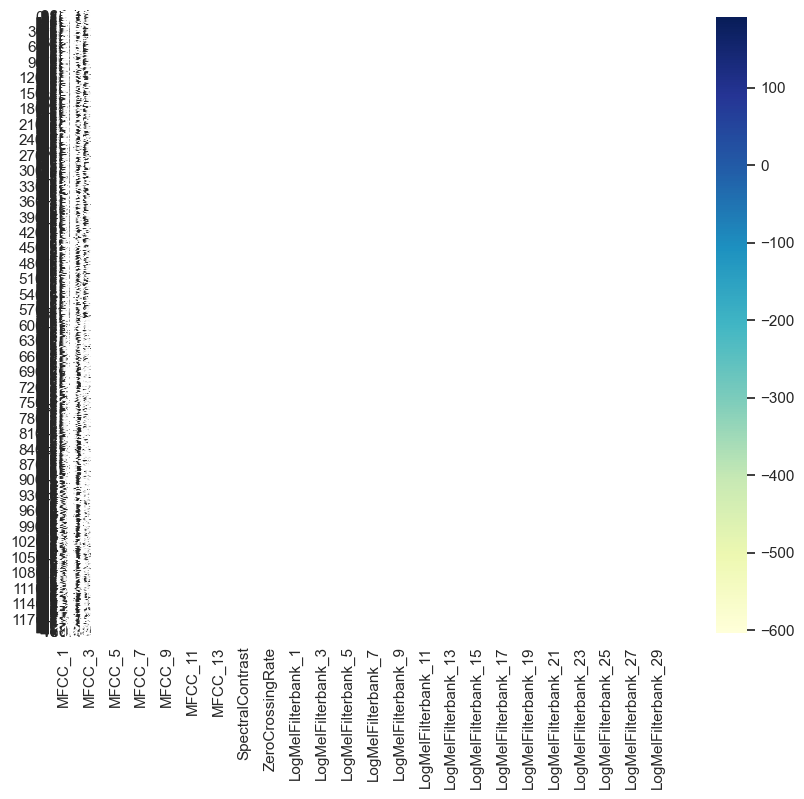

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a heatmap
sns.set(style="whitegrid")  # Optional: Set the seaborn style
plt.figure(figsize=(10, 8))  # Optional: Set the figure size

# Create the heatmap using seaborn's heatmap function
sns.heatmap(df.iloc[:, 1:], cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)

# Display the heatmap
plt.show()


In [54]:
my_list = list(df)

print (my_list)

['Names', 'MFCC_1', 'MFCC_2', 'MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10', 'MFCC_11', 'MFCC_12', 'MFCC_13', 'Chroma', 'SpectralContrast', 'Tonnetz', 'ZeroCrossingRate', 'RMSEnergy', 'LogMelFilterbank_1', 'LogMelFilterbank_2', 'LogMelFilterbank_3', 'LogMelFilterbank_4', 'LogMelFilterbank_5', 'LogMelFilterbank_6', 'LogMelFilterbank_7', 'LogMelFilterbank_8', 'LogMelFilterbank_9', 'LogMelFilterbank_10', 'LogMelFilterbank_11', 'LogMelFilterbank_12', 'LogMelFilterbank_13', 'LogMelFilterbank_14', 'LogMelFilterbank_15', 'LogMelFilterbank_16', 'LogMelFilterbank_17', 'LogMelFilterbank_18', 'LogMelFilterbank_19', 'LogMelFilterbank_20', 'LogMelFilterbank_21', 'LogMelFilterbank_22', 'LogMelFilterbank_23', 'LogMelFilterbank_24', 'LogMelFilterbank_25', 'LogMelFilterbank_26', 'LogMelFilterbank_27', 'LogMelFilterbank_28', 'LogMelFilterbank_29', 'LogMelFilterbank_30']


In [60]:
import librosa
import pandas as pd
import numpy as np

# Load the audio file
audio, sr = librosa.load("Complete Dataset/Individual Voices - Train/Arunanshu/arun.wav", sr=44100)

# Calculate the total number of clips
clip_duration = 5
clip_samples = int(sr * clip_duration)
total_clips = len(audio) // clip_samples

# Create the output DataFrame
columns = ["Names"] + [f"PNCC_{i+1}" for i in range(13)]
dfTest = pd.DataFrame(columns=columns)
dfTest["Names"] = "Trial"

# Split the audio into clips and extract features for each clip
for i in range(total_clips):
    clip_start = i * clip_samples
    clip_end = (i + 1) * clip_samples
    clip = audio[clip_start:clip_end]

    # Extract MFCC features
    mfcc_features = librosa.feature.mfcc(y=clip, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048)

    # Normalize the cepstral coefficients (equivalent to PNCC)
    pncc_features = (mfcc_features - np.mean(mfcc_features, axis=1)[:, np.newaxis]) / (np.std(mfcc_features, axis=1)[:, np.newaxis] + 1e-8)

    # Concatenate all features into a single row
    row_values = ["Trial"] + pncc_features.mean(axis=1).tolist()

    # Append the row to the DataFrame
    dfTest = dfTest._append(pd.Series(row_values, index=dfTest.columns), ignore_index=True)

# Display the resulting DataFrame
dfTest

,Names,PNCC_1,PNCC_2,PNCC_3,PNCC_4,PNCC_5,PNCC_6,PNCC_7,PNCC_8,PNCC_9,PNCC_10,PNCC_11,PNCC_12,PNCC_13
0,Trial,-3.540322e-07,-8.850806e-08,-8.850805e-09,1.770161e-08,-1.770161e-08,4.425403e-08,8.850806e-08,-8.850805e-09,-5.310483e-08,1.770161e-08,-1.770161e-08,3.540322e-08,-1.062097e-07
1,Trial,-5.266230e-07,6.195564e-08,-2.655242e-08,-2.655242e-08,4.425403e-09,2.655242e-08,-2.655242e-08,8.961441e-08,4.425403e-08,5.310483e-08,5.089213e-08,-3.540322e-08,3.540322e-08
2,Trial,7.080644e-08,-3.540322e-08,8.850805e-09,-4.867943e-08,8.850805e-09,-1.770161e-08,6.195564e-08,-2.212701e-08,-5.310483e-08,-4.425403e-08,-3.319052e-08,-8.850806e-08,1.770161e-08
3,Trial,-4.425403e-08,5.310483e-08,8.850805e-09,-4.425403e-08,-3.319052e-09,-2.212701e-09,-4.425403e-08,8.850805e-09,-7.523185e-08,-1.062097e-07,-2.655242e-08,-5.310483e-08,6.859374e-08
4,Trial,-1.178264e-07,-8.352948e-08,1.327621e-08,-2.655242e-08,0.000000e+00,-7.080644e-08,3.540322e-08,-4.425403e-08,0.000000e+00,3.208417e-08,-2.655242e-08,-3.540322e-08,-2.655242e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Trial,-2.212701e-07,2.920766e-07,-2.212701e-08,0.000000e+00,-1.327621e-08,4.480721e-08,0.000000e+00,1.770161e-08,-6.195564e-08,-1.233581e-07,-3.540322e-08,1.416129e-07,9.957157e-09
298,Trial,-8.850806e-08,-2.124193e-07,1.770161e-08,-1.327621e-08,-1.548891e-08,-7.080644e-08,5.697706e-08,1.770161e-08,6.195564e-08,4.425403e-09,2.212701e-08,-4.204133e-08,6.859374e-08
299,Trial,-6.195564e-08,3.540322e-08,8.850805e-09,1.106351e-08,0.000000e+00,6.859374e-08,7.080644e-08,9.735886e-08,-1.770161e-07,-4.425403e-08,-2.655242e-08,1.770161e-08,-8.850805e-09
300,Trial,-1.770161e-08,9.735886e-08,-8.850805e-09,3.097782e-08,6.638104e-09,-8.850806e-08,-3.540322e-08,2.655242e-08,5.310483e-08,4.425403e-08,2.655242e-08,8.850805e-09,7.965726e-08


In [64]:
from librosa.core import stft
from librosa import filters
from librosa import to_mono
import numpy as np

import scipy


def medium_time_power_calculation(power_stft_signal, M=2):
    medium_time_power = np.zeros_like(power_stft_signal)
    power_stft_signal = np.pad(power_stft_signal, [(M, M), (0, 0)], 'constant')
    for i in range(medium_time_power.shape[0]):
        medium_time_power[i, :] = sum([1 / float(2 * M + 1) *
                                       power_stft_signal[i + k - M, :]
                                       for k in range(2 * M + 1)])
    return medium_time_power


def asymmetric_lawpass_filtering(rectified_signal, lm_a=0.999, lm_b=0.5):
    floor_level = np.zeros_like(rectified_signal)
    floor_level[0, ] = 0.9 * rectified_signal[0, ]
    for m in range(floor_level.shape[0]):
        floor_level[m, ] = np.where(rectified_signal[m, ] >=
                                    floor_level[m - 1, ],
                                    lm_a * floor_level[m - 1, ] +
                                    (1 - lm_a) * rectified_signal[m, ],
                                    lm_b * floor_level[m - 1, ] +
                                    (1 - lm_b) * rectified_signal[m, ])

    return floor_level


def halfwave_rectification(subtracted_lower_envelope, th=0):
    return np.where(subtracted_lower_envelope < th,
                    np.zeros_like(subtracted_lower_envelope),
                    subtracted_lower_envelope)


def temporal_masking(rectified_signal, lam_t=0.85, myu_t=0.2):
        # rectified_signal[m, l]
    temporal_masked_signal = np.zeros_like(rectified_signal)
    online_peak_power = np.zeros_like(rectified_signal)
    temporal_masked_signal[0, :] = rectified_signal[0, ]
    online_peak_power[0, :] = rectified_signal[0, :]
    for m in range(1, rectified_signal.shape[0]):
        online_peak_power[m, :] = np.maximum(lam_t * online_peak_power[m-1, :],
                                             rectified_signal[m, :])
        temporal_masked_signal[m, :] = np.where(
            rectified_signal[m, :] >= lam_t * online_peak_power[m - 1, :],
            rectified_signal[m, :],
            myu_t * online_peak_power[m - 1, :])

    return temporal_masked_signal


def switch_excitation_or_non_excitation(temporal_masked_signal,
                                        floor_level, lower_envelope,
                                        medium_time_power, c=2):
    return np.where(medium_time_power >= c * lower_envelope,
                    temporal_masked_signal, floor_level)


def weight_smoothing(final_output, medium_time_power, N=4, L=128):

    spectral_weight_smoothing = np.zeros_like(final_output)
    for m in range(final_output.shape[0]):
        for l in range(final_output.shape[1]):
            l_1 = max(l - N, 1)
            l_2 = min(l + N, L)
            spectral_weight_smoothing[m, l] = (1/float(l_2 - l_1 + 1)) * \
            sum([(final_output[m, l_] / medium_time_power[m, l_])
                 for l_ in range(l_1, l_2)])
    return spectral_weight_smoothing


def time_frequency_normalization(power_stft_signal,
                                 spectral_weight_smoothing):
    return power_stft_signal * spectral_weight_smoothing


def mean_power_normalization(transfer_function,
                             final_output, lam_myu=0.999, L=80, k=1):
    myu = np.zeros(shape=(transfer_function.shape[0]))
    myu[0] = 0.0001
    normalized_power = np.zeros_like(transfer_function)
    for m in range(1, transfer_function.shape[0]):
        myu[m] = lam_myu * myu[m - 1] + \
            (1 - lam_myu) / L * \
            sum([transfer_function[m, s] for s in range(0, L - 1)])
    normalized_power = k * transfer_function / myu[:, None]

    return normalized_power


def power_function_nonlinearity(normalized_power, n=15):
    return normalized_power ** float(1 / n)


def pncc(audio_wave, n_fft=512, sr=16000, winlen=0.020, winstep=0.010,
         n_mels=128, n_pncc=13, weight_N=4, power=2):

    pre_emphasis_signal = scipy.signal.lfilter([1.0, -0.97], 1, audio_wave)
    mono_wave = to_mono(pre_emphasis_signal.T)
    stft_pre_emphasis_signal = np.abs(stft(mono_wave,
                                           n_fft=n_fft,
                                           hop_length=int(sr * winstep),
                                           win_length=int(sr * winlen),
                                           window=np.ones(int(sr * winlen)),
                                           center=False)) ** power

    mel_filter = np.abs(filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)) ** power
    power_stft_signal = np.dot(stft_pre_emphasis_signal.T, mel_filter.T)

    medium_time_power = medium_time_power_calculation(power_stft_signal)

    lower_envelope = asymmetric_lawpass_filtering(
        medium_time_power, 0.999, 0.5)

    subtracted_lower_envelope = medium_time_power - lower_envelope

    rectified_signal = halfwave_rectification(subtracted_lower_envelope)

    floor_level = asymmetric_lawpass_filtering(rectified_signal)

    temporal_masked_signal = temporal_masking(rectified_signal)

    final_output = switch_excitation_or_non_excitation(
        temporal_masked_signal, floor_level, lower_envelope,
        medium_time_power)

    spectral_weight_smoothing = weight_smoothing(
        final_output, medium_time_power, L=n_mels)

    transfer_function = time_frequency_normalization(
        power_stft_signal,
        spectral_weight_smoothing)

    normalized_power = mean_power_normalization(
        transfer_function, final_output, L=n_mels)

    power_law_nonlinearity = power_function_nonlinearity(normalized_power)

    dct = scipy.fftpack.dct(power_law_nonlinearity, axis=1, type=2, norm='ortho')[:, :n_pncc]

    return dct

audio, sr = librosa.load("Complete Dataset/Individual Voices - Train/Arunanshu/arun.wav", sr=44100)
op = pncc(audio, n_fft=2048, sr=44100, winlen=0.020, winstep=0.010, n_mels=13, n_pncc=13, weight_N=4, power=2)
# y=clip, sr=sr, n_mfcc=13, hop_length=512, n_fft=2048

C:\Users\Dell\AppData\Local\Temp\ipykernel_18440\1951083283.py:71: RuntimeWarning: invalid value encountered in scalar divide
  sum([(final_output[m, l_] / medium_time_power[m, l_])


In [65]:
op

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])